In [1]:
import numpy as np
import matplotlib.pyplot as plot
from IPython.display import Image
from scipy import ndimage, stats

In [2]:
#Function that returns centroid for an image
#param image: file path for wanted image
#param threshold: value 0-255 where all pixel values below this are set to 0
#Calculates center in meters
def centroid(image, threshold):
    #in plot.imread()[] - first and second indices are position, third is color (R = 0, G = 1, B = 2)
    #Take only B = 2 as this yielded the best center position
    redchannel=plot.imread(image)[:,:,2].astype(float)
    #Set values below threshold to 0
    redchannel[redchannel<threshold]=0
    four8_micron=ndimage.center_of_mass(redchannel)
    meters=np.ones(2)
    #Convert from 4.8 micron per pixel to micron then to meters
    for i in range(2):
        meters[i]= (four8_micron[i]* 4.8) * (10 ** -6)
    return(meters)

In [3]:
# Functions
from scipy.optimize import curve_fit
import math
# fit function is linear where f is the independent variable and b is a y intercept
#param f in Hz
#param A is the slope where A = 8pi * d * D /c
# param b in meters
d = 103.0 / 100 #meters
D = 787.1 / 100 #meters
def funcC(f, A, b):
    x = A * f + b
    return x.astype(float)
#calculation for c from A in m/s
def findC(A):
    d = 103.0 / 100 #meters
    D = 791.1 / 100 #meters
    c = (d * 8.0 * math.pi * D) / A #meters / s
    return c
def errorC(a, d1, d2, F, aerror, derror, Derror, Ferror):
    Lerror2 = (Ferror ** 2) + (Derror ** 2)
    L = d2 + F
    cerror = Lerror2 / (L ** 2) + (derror / d1) ** 2 + (aerror / a) ** 2
    return cerror ** (1/2)

Need to create x array of frequencies to feed to curve fit as independent variable. Need to calculate array of x distances, use distance from previous centroid

In [32]:
# n is number of data points - if you use less than 12, images starting from the back will begin to not be used
n = 12
#xvals = horizontal position of centroid
xvals = np.zeros(n)
xvalsadjust = np.zeros(n-2)
for i in range(n):
    mydata = centroid("Photos/laser%d.jpg"%(i+1), 250)
    xvals[i] = mydata[1]
#print("index %d:%f"%(i,mydata[1]))
    if i > 7:
        if i == 8 or i == 9:
            continue;
        xvalsadjust[i - 2] = mydata[1]
        continue;
    xvalsadjust[i] = mydata[1]
allfreqs = np.array([102.6,122.7,141.5,164.3,180.5,203.9,232.9,259.3,283.1,301.4,328.1,341.0])
freqs = np.zeros(n)
freqsadjust = np.zeros(n - 2)
for i in range(n):
    freqs[i] = allfreqs[i]
    if i > 7:
        if i == 8 or i == 9:
            continue;
        freqsadjust[i - 2] = allfreqs[i]
        continue;
    freqsadjust[i] = allfreqs[i]

In [33]:
mysig8 = np.zeros(n8)
for i in range(n8):
    mysig[i] = 0.000005
mysig12 = np.array([0.000005] * 12)
mysig10 = np.array([0.000005] * 10)

#### Plot of all data with fit line

A =  -4.418243896238852e-07 1.8513248964532168e-08
Speed of light from xvals: 4.635097e8


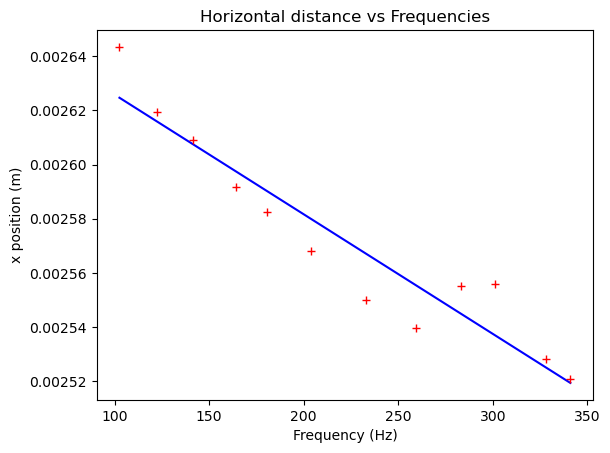

In [34]:
#fit our data to linear function funcC
cx, pcov = curve_fit(funcC, freqs, xvals,sigma = mysig12, absolute_sigma = True)
#calculate values for plotting purposes
calcvalsx = np.zeros(n)
for i in range(n):
    calcvalsx[i] = funcC(freqs[i],cx[0],cx[1])
plot.plot(freqs, calcvalsx, 'b')
plot.title("Horizontal distance vs Frequencies")
plot.plot(freqs, xvals, 'r+')
plot.ylabel("x position (m)")
plot.xlabel("Frequency (Hz)")
foundcx = findC(cx[0])
print("A = ", cx[0], pcov[0,0]**0.5)
print("Speed of light from xvals: %fe8"%(np.abs(foundcx / (10 ** 8))))

#### Plot of data minus 9th and 10th points

A =  -4.418243896238852e-07 2.026868945611643e-08
Speed of light from xvalsadjust: 4.229986e8


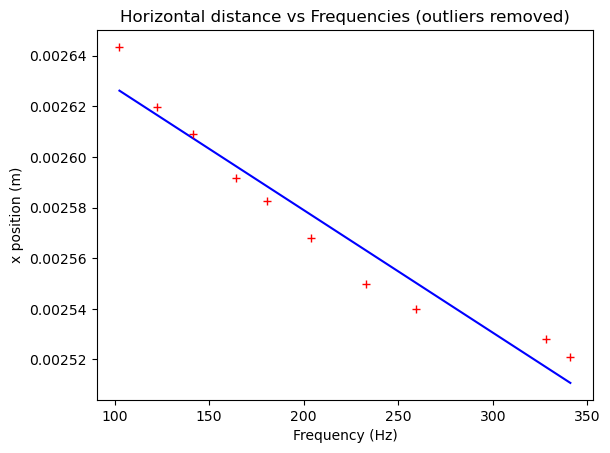

In [35]:
#fit our data to linear function funcC
cxadjust, pcovadjust = curve_fit(funcC, freqsadjust, xvalsadjust,sigma = mysig10, absolute_sigma = True)
#calculate values for plotting purposes
calcvalsxadjust = np.zeros(n -2)
for i in range(n - 2):
    calcvalsxadjust[i] = funcC(freqsadjust[i],cxadjust[0],cxadjust[1])
plot.plot(freqsadjust, calcvalsxadjust, 'b')
plot.title("Horizontal distance vs Frequencies (outliers removed)")
plot.plot(freqsadjust, xvalsadjust, 'r+')
plot.ylabel("x position (m)")
plot.xlabel("Frequency (Hz)")
print("A = ", cx[0], pcovadjust[0,0]**0.5)
foundcxadjust = findC(cxadjust[0])
print("Speed of light from xvalsadjust: %fe8"%(np.abs(foundcxadjust / (10 ** 8))))

#### Plot of data with last 4 points removed

In [36]:
# n is number of data points - if you use less than 12, images starting from the back will begin to not be used
n8 = 8
#xvals = horizontal position of centroid
xvals8 = np.zeros(n8)
for i in range(n8):
    mydata8 = centroid("Photos/laser%d.jpg"%(i+1), 250)
    xvals8[i] = mydata8[1]
allfreqs = np.array([102.6,122.7,141.5,164.3,180.5,203.9,232.9,259.3,283.1,301.4,328.1,341.0])
freqs8 = np.zeros(n8)
for i in range(n8):
    freqs8[i] = allfreqs[i]

A =  -4.418243896238852e-07 3.4895360150591385e-08
Speed of light from xvals: 3.162310e8


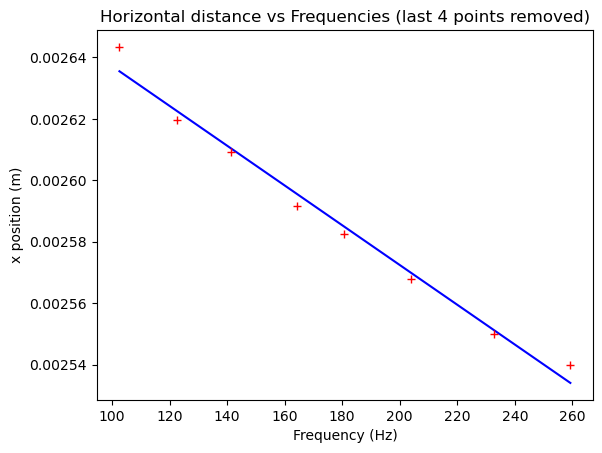

In [37]:
#fit our data to linear function funcC

cx8, pcov8 = curve_fit(funcC, freqs8, xvals8,sigma = mysig, absolute_sigma = True)
#calculate values for plotting purposes
calcvalsx8 = np.zeros(n8)
for i in range(n8):
    calcvalsx8[i] = funcC(freqs8[i],cx8[0],cx8[1])
plot.plot(freqs8, calcvalsx8, 'b')
plot.title("Horizontal distance vs Frequencies (last 4 points removed)")
plot.plot(freqs8, xvals8, 'r+')
plot.ylabel("x position (m)")
plot.xlabel("Frequency (Hz)")
foundcx8 = findC(cx8[0])
print("A = ", cx[0], pcov8[0,0]**0.5)
printcval = np.abs(foundcx8 / (10 ** 8))
print("Speed of light from xvals: %fe8"%(printcval))

#### Error

In [38]:
a = cx8[0]
aerror = pcov8[0,0] ** .5
derror = 0.01
Derror = 0.05
Ferror = 0.01
F = 2.00
d2 = D - F
#error func errorC(a, d, D, F, aerror, derror, Derror, Ferror):
cerror = errorC(a, d, d2, F, aerror, derror, Derror, Ferror)
printtext = "We calculated the speed of light to be: ({0} +/- {1}) * 10^8 m/s"
formatted = printtext.format(printcval, cerror * (10 ** -8) * abs(foundcx8))
print(formatted)

We calculated the speed of light to be: (3.1623103643690293 +/- 0.17435100640426202) * 10^8 m/s
